## Background

- Clustering is a statistical technique that involves grouping similar data points or observations into distinct subsets, or clusters, based on certain features or characteristics, enabling the identification of patterns, relationships, and structures within datasets, and facilitating decision-making processes.

- **Objective:** The primary goal of clustering is to identify inherent patterns or structures within a dataset, allowing for the categorization of data points with similar attributes.

- **Unsupervised Learning:** Clustering is often employed in unsupervised learning, where the algorithm does not have prior information about the groupings and discovers patterns solely from the data.

- **Similarity Measures:** Clustering relies on similarity measures, which quantify how closely related or alike two data points are. Common metrics include Euclidean distance, cosine similarity, or other distance measures.

- **Types of Clustering Algorithms:**
  - *Hierarchical Clustering:* Builds a hierarchy of clusters, either agglomeratively (bottom-up) or divisively (top-down).
  - *Partitioning Algorithms:* Divide the dataset into non-overlapping subsets, such as K-Means clustering.
  - *Density-Based Clustering:* Identifies dense regions in the data space, like DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

**Why Do We Perform Clustering:**

- **Pattern Recognition:** Clustering helps in recognizing patterns and structures within a dataset, revealing relationships that might not be apparent through simple data inspection.

- **Data Compression and Reduction:** Clustering facilitates the reduction of complex datasets into more manageable and interpretable groups, aiding in summarizing information.

- **Anomaly Detection:** Identifying outliers or anomalies in a dataset becomes more straightforward through clustering, as unusual patterns may not conform to the established clusters.

- **Decision Making:** Clustering provides insights for decision-making processes by organizing data into meaningful groups, helping to understand the underlying structure of the information.

- **Improved Efficiency:** In various applications, such as marketing or customer segmentation, clustering can enhance efficiency by categorizing data points based on similar characteristics, leading to targeted and more effective strategies.

- **Exploratory Data Analysis:** Clustering is an essential tool in exploratory data analysis, allowing researchers and analysts to gain a better understanding of the inherent structure and properties of a dataset.

In [ ]:
!pip install retentioneering

# 1. Loading data

In [1]:
# import required libraries
import numpy as np
import pandas as pd
from retentioneering import datasets

In [2]:
# load sample user behavior data:
stream = datasets.load_simple_shop().split_sessions(timeout=(30, 'm'))
#split_sessions user paths into sessions creating session_start and session_end events based on 30 minutes timeout
#The time distance between consecutive events within each session will be less than 30 minutes.

In [4]:
stream.to_dataframe().head()

,event_id,event_type,event_index,event,timestamp,user_id,session_id
0,85e62a90-74d1-4fd4-8a86-b7f98e317e07,path_start,0,path_start,2019-11-01 17:59:13.273932,219483890,219483890_1
1,67bda0b6-1d82-4fb8-a7e4-4a45bb8111db,session_start,0,session_start,2019-11-01 17:59:13.273932,219483890,219483890_1
2,85e62a90-74d1-4fd4-8a86-b7f98e317e07,raw,0,catalog,2019-11-01 17:59:13.273932,219483890,219483890_1
3,2cb2c540-6218-4d5b-9249-95cde7214ae1,raw,1,product1,2019-11-01 17:59:28.459271,219483890,219483890_1
4,7890d20d-5c8c-4b86-a28d-740059a6f5a9,raw,2,cart,2019-11-01 17:59:29.502214,219483890,219483890_1


In [5]:
# Example for user_id = 219483890, with 4 sessions
res = stream.split_sessions(timeout=(30, 'm')).to_dataframe()
res[res['user_id'] == 219483890]

,event_id,event_type,event_index,event,timestamp,user_id,session_id
0,85e62a90-74d1-4fd4-8a86-b7f98e317e07,path_start,0,path_start,2019-11-01 17:59:13.273932,219483890,219483890_1
1,67bda0b6-1d82-4fb8-a7e4-4a45bb8111db,session_start,0,session_start,2019-11-01 17:59:13.273932,219483890,219483890_1
2,7f107bb0-0780-4dc1-8acf-467655c0ab85,session_start,0,session_start,2019-11-01 17:59:13.273932,219483890,219483890_1
3,85e62a90-74d1-4fd4-8a86-b7f98e317e07,raw,0,catalog,2019-11-01 17:59:13.273932,219483890,219483890_1
4,2cb2c540-6218-4d5b-9249-95cde7214ae1,raw,1,product1,2019-11-01 17:59:28.459271,219483890,219483890_1
5,7890d20d-5c8c-4b86-a28d-740059a6f5a9,raw,2,cart,2019-11-01 17:59:29.502214,219483890,219483890_1
6,37da0b1b-7491-4233-a70a-a2ba11154595,raw,3,catalog,2019-11-01 17:59:32.557029,219483890,219483890_1
7,faeac634-4938-43c3-b9ba-43ed6083009a,session_end,3,session_end,2019-11-01 17:59:32.557029,219483890,219483890_1
8,21ca84b8-3fb4-406b-bcbc-07042fc8e582,session_end,3,session_end,2019-11-01 17:59:32.557029,219483890,219483890_1
4218,eef69086-5325-40ed-b00c-93605fddf974,session_start,2096,session_start,2019-12-06 16:22:57.484842,219483890,219483890_2


# 2. Identifying the optimal number of clusters
- The elbow method is a popular technique used in cluster analysis to determine the optimal number of clusters in a dataset. The goal is to find a balance between the accuracy of clustering and the simplicity of the model.

- K-Means Clustering: The elbow method is commonly applied to K-Means clustering, a partitioning algorithm that divides a dataset into 'k' distinct, non-overlapping subsets.

- Varying Cluster Numbers: The key idea behind the elbow method is to run the K-Means algorithm for a range of cluster numbers (k values) and observe how the within-cluster sum of squares (WCSS) changes.

- Within-Cluster Sum of Squares (WCSS): WCSS represents the sum of squared distances between each data point and the centroid of its assigned cluster. A lower WCSS indicates better intra-cluster cohesion.

- Elbow Point: As the number of clusters increases, the WCSS typically decreases, reflecting better clustering. However, the rate of improvement diminishes beyond a certain point. The "elbow" on the plot of WCSS versus the number of clusters indicates the optimal number of clusters.

- Elbow Interpretation: The point at which the rate of WCSS reduction sharply decreases, forming an elbow-like bend in the plot, suggests the optimal number of clusters. This is the point where additional clusters provide diminishing returns in terms of improved cohesion.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


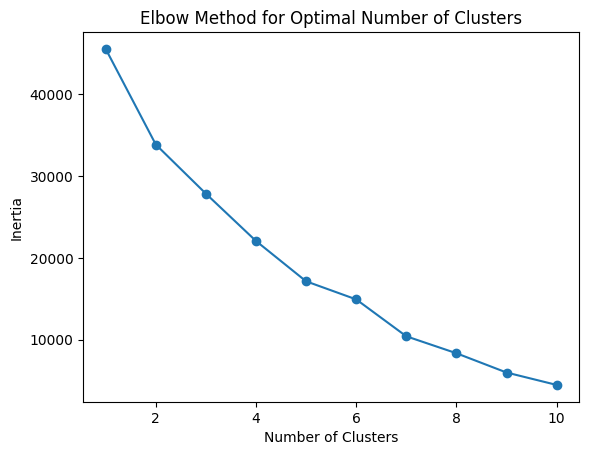

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'stream' is your dataframe
# If 'event' column contains textual data, use TfidfVectorizer to convert it to numerical features
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(stream['event'].astype(str))  # Ensure 'event' is a string column

# Calculate inertia for different cluster numbers
inertia_values = []
possible_cluster_numbers = range(1, 11)  # Adjust the range as needed

for n_clusters in possible_cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(possible_cluster_numbers, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

- From the above we can identify that the optimal number of clusters = 4

# 3. Identifying Clusters

<Axes: xlabel='cluster_id', ylabel='value'>

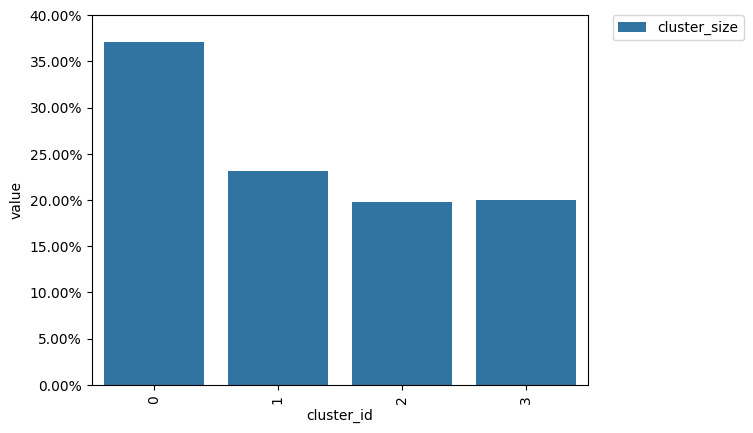

In [6]:
from retentioneering.tooling.clusters import Clusters

# Assuming 'stream' is your Eventstream or DataFrame
clusters = Clusters(eventstream=stream)
features = clusters.extract_features(feature_type='tfidf', ngram_range=(1, 1)) #ngram_range(1,1)-single events/unigram - splice user paths to short subsequences of particular length
clusters.fit(method='kmeans', n_clusters=4, X=features, random_state=42)

# Separate the fitting and plotting steps
clusters.plot()

# 4. Fitting Clusters
- Employing clustering algorithm to group data points based on similarities, revealing inherent patterns within a dataset.
- Fitting clusters is a fundamental step in exploratory data analysis, aiding in data summarization & anomaly detection.

In [7]:
clusters = Clusters(eventstream=stream)
features = clusters.extract_features(ngram_range=(1, 2), feature_type='tfidf')
clusters.fit(method='kmeans', n_clusters=4, X=features, random_state=42)

# 5. Cluster Analysis

<Axes: xlabel='cluster_id', ylabel='value'>

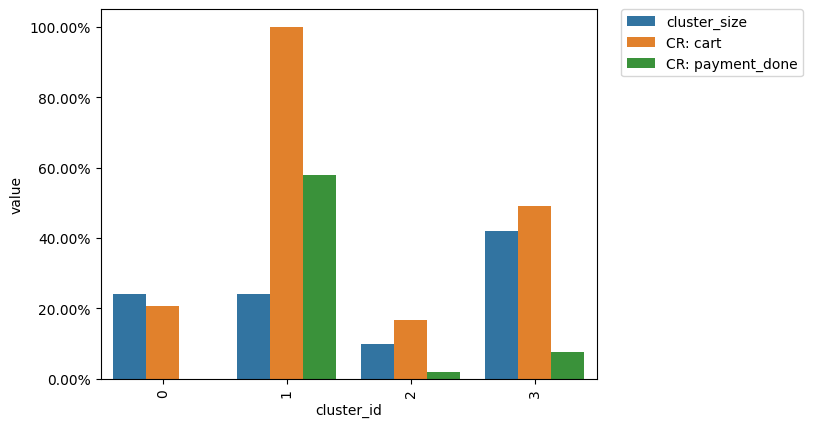

In [8]:
# Cluster statistics
clusters.plot(targets=['cart', 'payment_done']) #targets - conversion rate for each cluster and each target event is displayed

- Cluster 3 has highest proportion of population size of 45%, but quite low rate of successfull payments (~7-8%).  
- Cluster 1 contains ~30% of the total users and 95% of them have at least one cart event in their trajectories, and only 50% of them had a successful payment transaction at least once.  


## 5.1 Projections
- Each dot represents a single user.
- Users with similar behavior are located close to each other.
- The plot represents the clusters’ projection on a low-dimensional space (applying dimension reduction) for user path's indexed by user IDs.  

<Axes: >

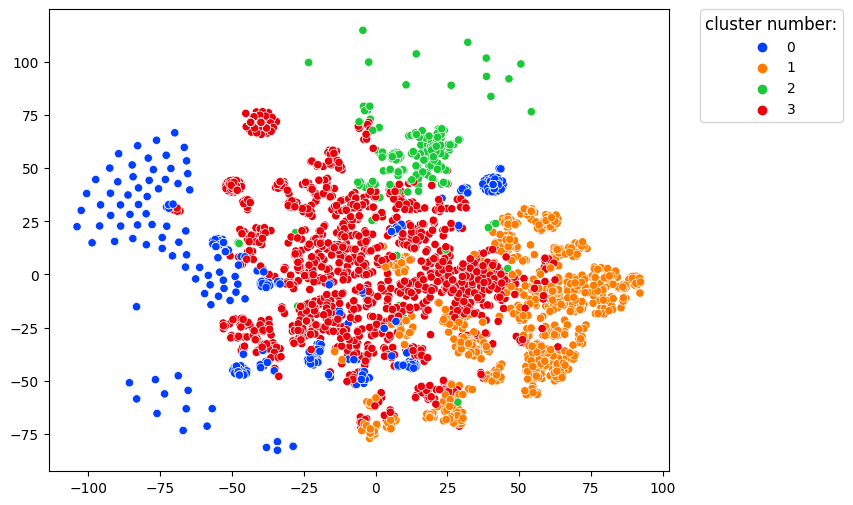

In [8]:
clusters.projection(method='tsne')

<Axes: >

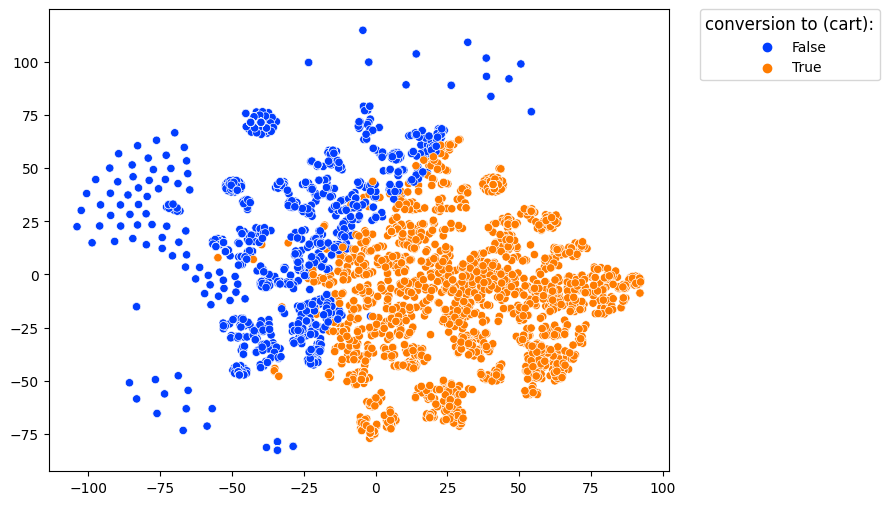

In [9]:
# color_type='targets' - color the projected dots with respect to conversion rates associated with the events defined in targets.
# If at least one target event appeared in a user’s trajectory, the user is colored as converted.

clusters.projection(method='tsne', color_type='targets', targets=['cart'])

## 5.1 Exploring individual clusters
- Understanding various paths taken by the users belong to their respective clusters

In [10]:
clusters .filter_cluster(cluster_id=0).add_start_end_events().transition_graph(targets={'positive': 'payment_done', 'negative': 'path_end'})

## 5.3 Clusters comparison

/usr/local/lib/python3.10/dist-packages/retentioneering/tooling/clusters/clusters.py:247: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_all.append(top_cluster, ignore_index=True, sort=False),  # type: ignore


<Axes: title={'center': 'top 8 events in cluster 0 (size: 24.05%) \nvs. all data (100%)'}, ylabel='% from total events'>

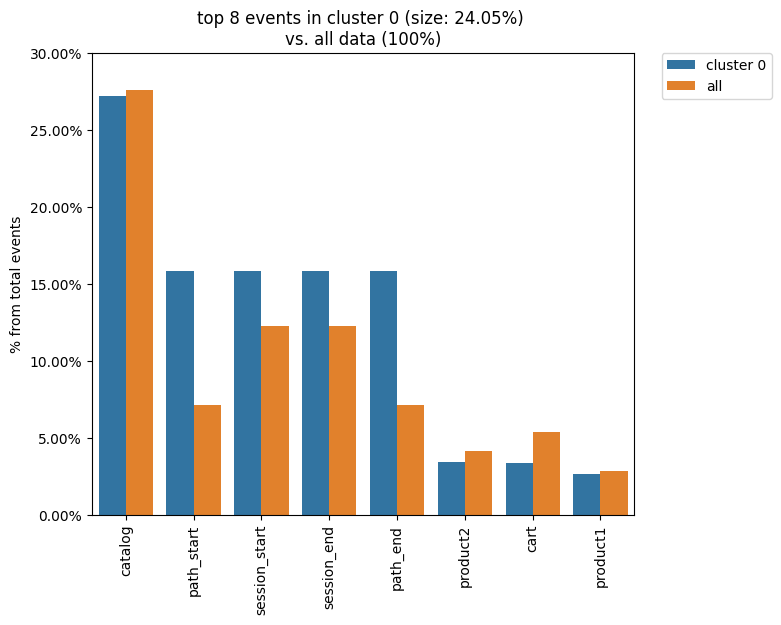

In [11]:
clusters.diff(cluster_id1=0)
#  Within cluster 0 the cart event takes ~5% of all events generated by the users from this cluster, whereas in the original eventstream the cart event holds ~3% of all events only.

/usr/local/lib/python3.10/dist-packages/retentioneering/tooling/clusters/clusters.py:247: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_all.append(top_cluster, ignore_index=True, sort=False),  # type: ignore


<Axes: title={'center': 'top 5 events in cluster 0 (size: 24.05%) \nvs. all data (100%)'}, ylabel="% of 'user_id' with given event">

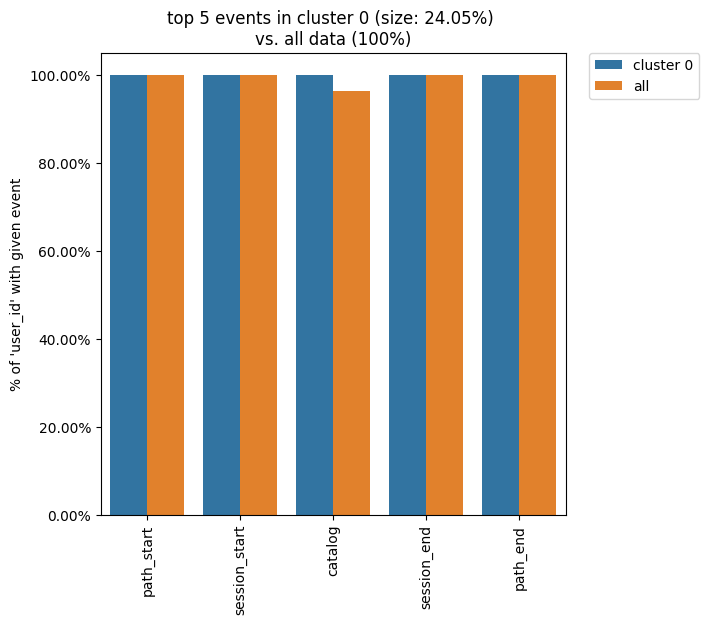

In [12]:
# weight_col - display cluster statistics as the shares of the unique users or unique sessions
clusters.diff(cluster_id1=0, top_n_events=5, weight_col='user_id')

# 100% of the users in cluster 0 had a catalog event, whereas ~97% of the users in the entire event had the same event.

/usr/local/lib/python3.10/dist-packages/retentioneering/tooling/clusters/clusters.py:247: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_all.append(top_cluster, ignore_index=True, sort=False),  # type: ignore


<Axes: title={'center': 'top 5 events in cluster 0 (size: 24.05%) \nvs. all data (100%)'}, ylabel="% of 'session_id' with given event">

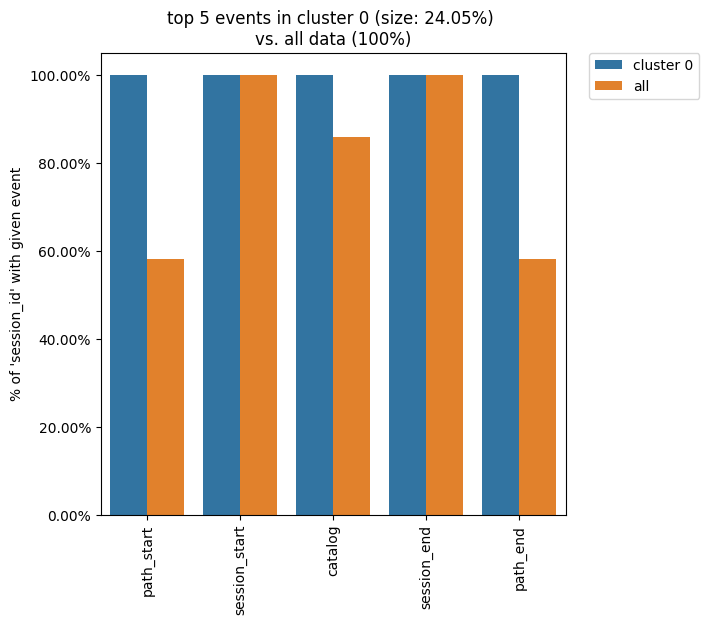

In [13]:
clusters.diff(cluster_id1=0, top_n_events=5, weight_col='session_id')

In [3]:
# comparing one cluster with the other
clusters.diff(cluster_id1=1, cluster_id2=2, cluster_id3=3, top_n_events=5)

NameError: ignored

# 6. Extracting Cluster Results

In [15]:
# Method 1 - return a pandas.Series containing user_ids as index and cluster_ids as values
clusters.user_clusters

user_id
122915       3
463458       3
1475907      3
1576626      2
2112338      3
            ..
999275109    1
999642905    1
999914554    3
999916163    0
999941967    0
Length: 3751, dtype: int32

In [16]:
# Method 2 - return dictionary containing cluster_id as a list of user_ids mapping
cluster_mapping = clusters.cluster_mapping
list(cluster_mapping.keys())

[0, 1, 2, 3]

In [17]:
# Get sample data for a cluster
cluster_mapping[0][:10]

[2653683,
 11582989,
 12638159,
 13220830,
 13791545,
 15085084,
 15905730,
 18842451,
 19134388,
 19713120]